# lying(normal) / standing(abnormal)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('./DSA_features.csv')

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
df.shape

(9120, 272)

In [5]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [6]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

Text(0, 0.5, 'Count')

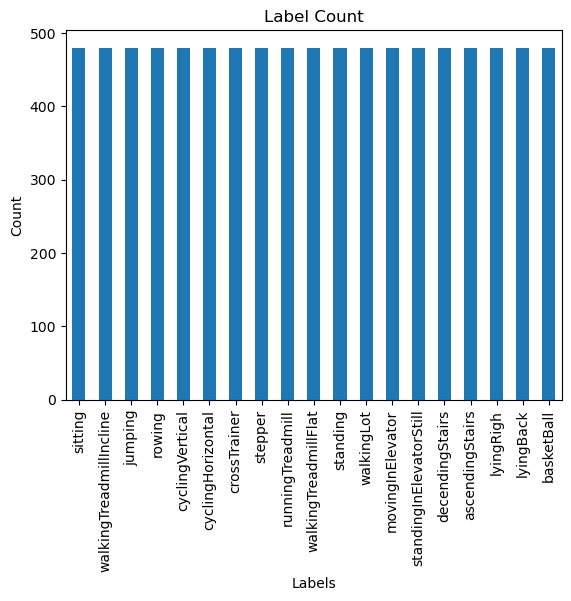

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [8]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [9]:
# 'lyingBack', 'lyingRigh' 을 'lying'으로 바꿈
df['activity'] = df['activity'].replace(['lyingBack', 'lyingRigh'], 'lying')

In [10]:
df['activity'].value_counts()

activity
lying                      960
sitting                    480
runningTreadmill           480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
walkingTreadmillIncline    480
standing                   480
walkingTreadmillFlat       480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
basketBall                 480
Name: count, dtype: int64

In [11]:
# 정상(normal)과 비정상(abnormal) 데이터 필터링
normal_data = df[df['activity'] == 'lying']
abnormal_data = df[df['activity'] == 'standing']

In [12]:
RANDOM_SEED = 42

# train/test 분할: normal 데이터의 절반을 train으로 사용
train_data = normal_data.sample(frac=0.5, random_state=RANDOM_SEED)  # 50%를 훈련용으로 사용
remaining_normal_data = normal_data.drop(train_data.index)  # 남은 데이터

# test 데이터 생성: remaining_normal_data와 abnormal_data를 섞기
test_data = pd.concat([remaining_normal_data, abnormal_data])
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)  # 데이터 섞기

# people은 전처리가 되어있지 않으므로 drop 또는 원핫인코딩 진행

# 훈련 및 테스트 세트 정의
X_train = train_data.drop(['activity','people'], axis=1).values  # activity,people 열 제외
y_train = train_data['activity'].values  # activity 열
X_test = test_data.drop(['activity','people'], axis=1).values  # activity,people 열 제외
y_test = test_data['activity'].values  # activity 열

# 결과 확인
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (480, 270)
y_train shape: (480,)
X_test shape: (960, 270)
y_test shape: (960,)


In [13]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
print("Train Data Shape:", X_train_scaled.shape)
print("Test Data Shape:", X_test_scaled.shape)

Train Data Shape: (480, 270)
Test Data Shape: (960, 270)


## 노이즈 추가

In [15]:
# 노이즈 추가
noise_factor = 0.2
X_train_noisy = X_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_scaled.shape)
X_test_noisy = X_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_scaled.shape)

In [16]:
# DAE 모델

input_dim = X_train.shape[1] # 입력차원 설정
encoding_dim = 32  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
# 인코더
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
# 디코더 (이진 분류 문제에서 확률 값을 출력 sigmoid, 연속적인 값을 예측해야 하는 회귀 문제 linear)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [17]:
# 훈련 데이터 준비
x_train = X_train_noisy  # 노이즈가 있는 훈련 데이터
x_train2 = X_train_scaled  # 노이즈가 없는 원본 데이터

In [18]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(x_train, x_train2, 
                          epochs=100, 
                          batch_size=16, 
                          shuffle=True, 
                          verbose=0,
                          validation_split = 0.1)

In [35]:
# 노이즈 제거 후 데이터 예측
denoised_data = autoencoder.predict(X_test_noisy)

# 결과 확인
print("Denoised data shape:", denoised_data.shape)
denoised_data

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Denoised data shape: (960, 270)


array([[2.2900162e-02, 3.1788257e-04, 1.2276891e-04, ..., 7.0948735e-02,
        9.9999040e-01, 8.0305276e-11],
       [9.9580765e-01, 9.9171853e-01, 9.9696445e-01, ..., 1.5805234e-01,
        9.9990410e-01, 8.2835003e-11],
       [9.9999809e-01, 9.9999994e-01, 9.9999928e-01, ..., 6.7059309e-11,
        9.8514492e-19, 2.5491637e-13],
       ...,
       [4.5596322e-01, 3.5546226e-03, 6.0872110e-03, ..., 5.9086330e-02,
        9.9999452e-01, 1.1496970e-10],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 5.2646635e-07,
        1.8024704e-13, 3.4807632e-11],
       [6.1711573e-13, 1.5531503e-14, 2.0079446e-14, ..., 1.5626359e-09,
        3.6265841e-09, 2.7012059e-15]], dtype=float32)

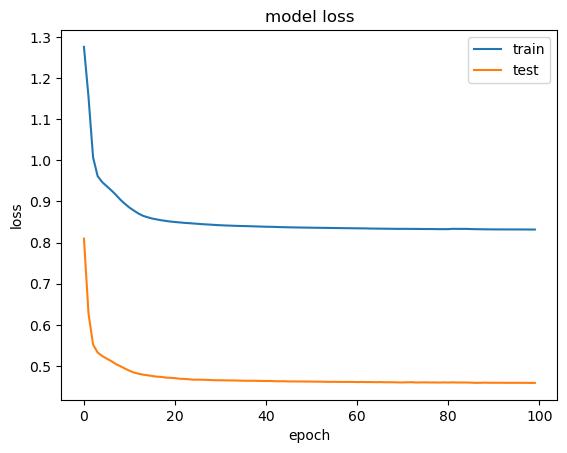

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [21]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,reconstruction_error
count,960.000000
mean,5.242095
std,0.263487
min,4.741096
25%,5.041846
50%,5.349370
75%,5.423730
max,8.349546


In [22]:
error_df.head()

,reconstruction_error,true_class
0,5.449911,standing
1,5.121649,lying
2,5.108615,lying
3,5.409421,standing
4,5.392388,standing


In [32]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold=5.3

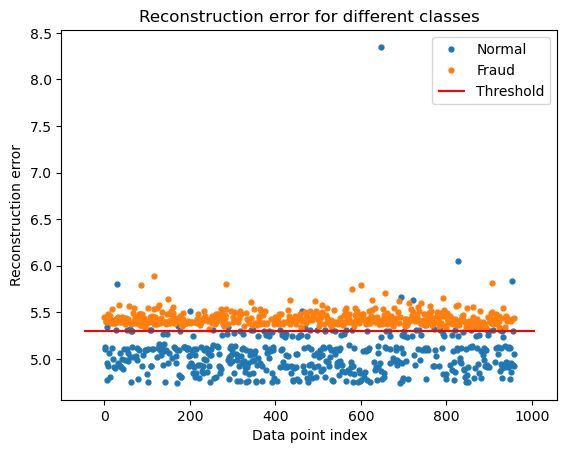

In [33]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 'lying' else "Fraud")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

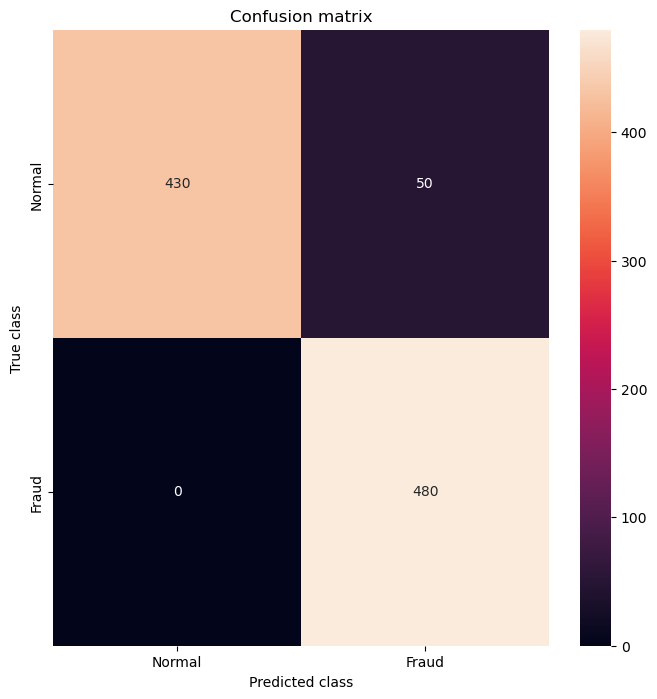

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       480
           1       0.91      1.00      0.95       480

    accuracy                           0.95       960
   macro avg       0.95      0.95      0.95       960
weighted avg       0.95      0.95      0.95       960



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

LABELS = ["Normal", "Fraud"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class.apply(lambda x: 1 if x == 'standing' else 0), y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class.apply(lambda x: 1 if x == 'standing' else 0), y_pred))